<a href="https://colab.research.google.com/github/tonyw54/GeorgeBrown/blob/main/Tony_Waterman_AppMath_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.2.1 Defining the business problem: Fake News Detection

The `final_en.csv` dataset addresses the business problem of **detecting and mitigating the spread of fake news**. This dataset is from kaggle at https://www.kaggle.com/datasets/evilspirit05/english-fake-news-dataset/data.

**Potential Applications:**

**Social Media Platforms:** Identify and flag potentially fake news articles shared on their platforms.

**News Organizations:** Develop tools to verify the authenticity of news stories.

**Search Engines:** Improve search results by prioritizing credible sources over fake news.

**Government Agencies:** Monitor and combat the spread of disinformation campaigns.

**Benefits:**

**Increased User Trust:** By reducing exposure to fake news, platforms and organizations can foster greater user trust and credibility.

**Reduced Misinformation:** Combatting the spread of false information can minimize its harmful impact on public opinion and decision-making.

**Improved Public Safety:** Fake news can incite violence or promote harmful behavior. Detecting and mitigating it can contribute to public safety.

**Enhanced Media Literacy:** By providing tools and resources to identify fake news, users can become more discerning consumers of information.

**Challenges:**

**Sophistication of Fake News:** Fake news can be increasingly difficult to distinguish from real news due to its advanced techniques.

**Bias and Subjectivity:** Defining what constitutes "fake news" can be subjective and influenced by political or ideological biases.

**Scalability:** Detecting fake news in real-time at a large scale can be computationally expensive and challenging.


## 2.2.2 Defining clear description about dataset and the link to the dataset.

The dataset I'm using is on Kaggle at https://www.kaggle.com/datasets/evilspirit05/english-fake-news-dataset/data

This dataset contains three columns:

1. title (text field)
2. text (text field)
3. lebel (binary field 0/1)

The dataset includes news articles collected from April 2021 to June 2021 for The New York Times and from January 2018 to November 2018 for The Guardian.

In [ ]:
!pip install datasets
!pip install scikit-learn
!pip install transformers
!pip install matplotlib
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
# !pip install kaggle # This is not needed on colab
!kaggle datasets download -d evilspirit05/english-fake-news-dataset
!unzip english-fake-news-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/evilspirit05/english-fake-news-dataset
License(s): MIT
 73% 7.00M/9.55M [00:00<00:00, 12.9MB/s]
100% 9.55M/9.55M [00:00<00:00, 11.7MB/s]
Archive:  english-fake-news-dataset.zip
  inflating: final_en.csv            


In [ ]:
import pandas as pd
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments
from transformers import TrainingArguments, Trainer, AdamW, get_linear_schedule_with_warmup
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datasets import Dataset

## 2.2.3 Define your approach

This workbook demonstrates two different approaches to fake news detection:

1. Fine-tuning a pre-trained BERT model: This approach leverages the power of transformer models for natural language processing. You are using the bert-base-uncased model and fine-tuning it on your fake news dataset. This involves updating the model's weights to make it more accurate for the specific task of fake news detection.

2. Building a custom LSTM model: This approach utilizes a recurrent neural network (RNN) with an LSTM layer. You are building a model from scratch using Keras, which involves defining the architecture of the model, including layers like Embedding, LSTM, and Dense. You then train this model on your dataset.

Data preprocessing is a crucial step in both approaches: You are cleaning the data, combining relevant features, and converting text into numerical representations that can be processed by the models.

Both approaches aim to achieve the same goal of classifying news as real or fake. However, they utilize different model architectures and techniques.

By exploring these two distinct approaches, the workbook provides a comprehensive understanding of different methods for tackling the fake news detection problem.

## 2.2.4 Show and plot dataset and apply data analysis on Dataset

The charts below show that there are the same number of fake news articles and real news articlea (5000 each) in the dataset. As well, the word cloud shows the most common words found in this dataset.

In [ ]:
def prepare_data(df):
  texts = df['text'].tolist()
  labels = df['lebel'].tolist()
  return texts, labels

# Split the data into training and validation sets
df = pd.read_csv("final_en.csv")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the training and validation data
train_texts, train_labels = prepare_data(train_df)
val_texts, val_labels = prepare_data(val_df)

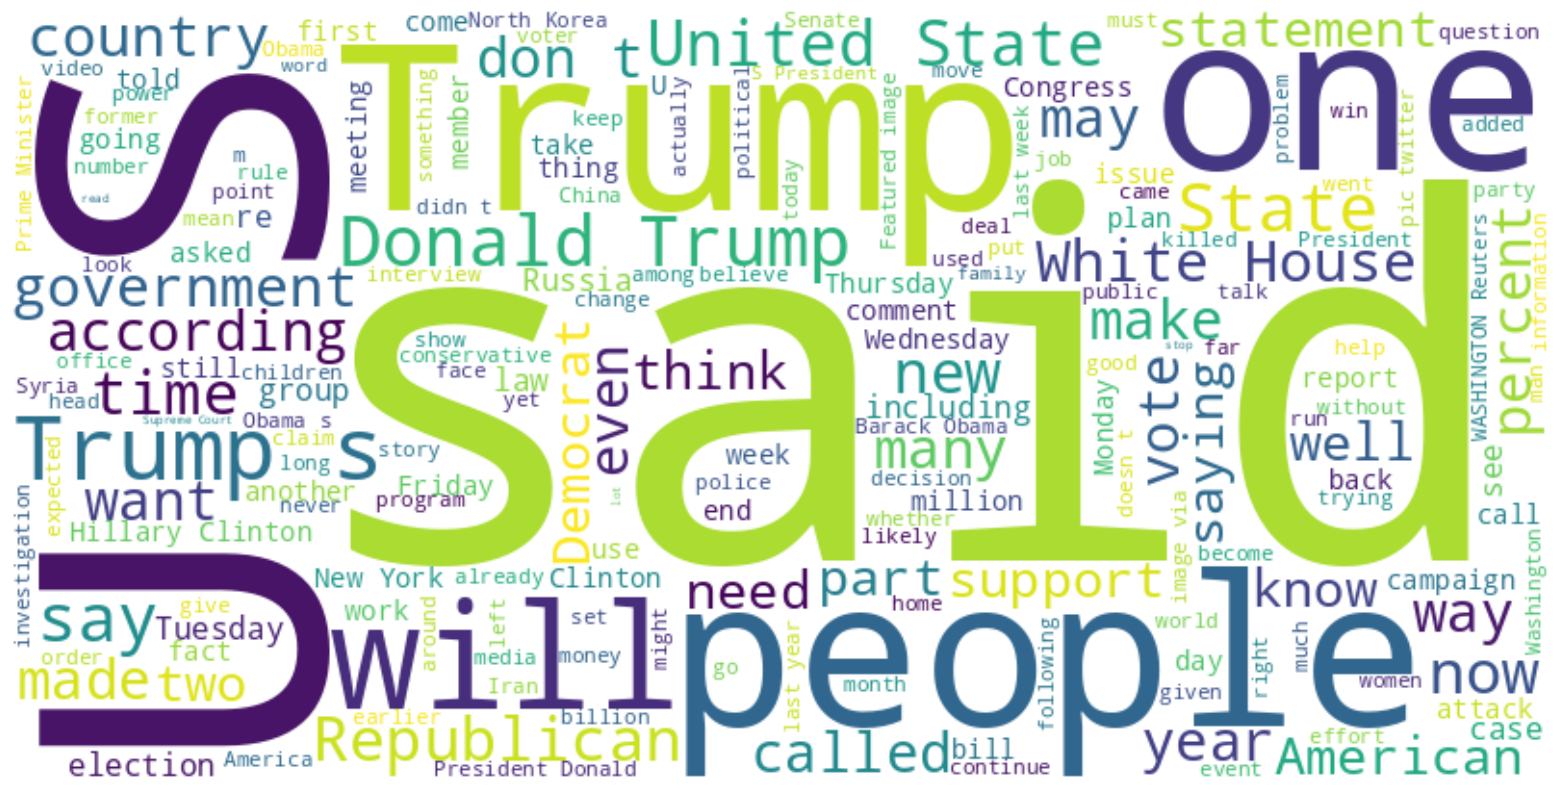

In [ ]:
# Combine all text entries into a single string
text = ' '.join(df['text'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

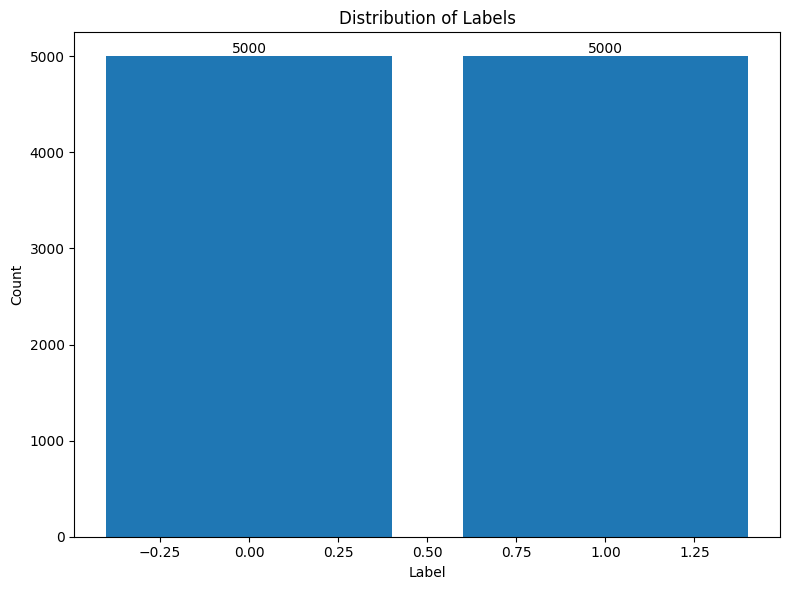

In [ ]:
label_counts = df['lebel'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Add the count on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 2.2.5 Explain in detail about the pipeline that you defined

The code defines a text classification pipeline using the transformers library.

This pipeline uses a pre-trained DistilBERT model (distilbert-base-uncased) which is a smaller, faster, cheaper and lighter version of BERT.

It is designed for text classification tasks, meaning it can analyze text and assign it to a category (in this case, "real" or "fake" news).

The pipeline is initialized with pipeline('text-classification', model='distilbert-base-uncased'), which downloads and stores the necessary model and tokenizer.

The pipeline can then be used to make predictions on new text by calling it as a function and providing the text as an argument.

This allows you to perform text classification without having to manually handle tokenization, model loading, and prediction extraction, simplifying the process.

In [ ]:
classifer = pipeline('text-classification', model='distilbert-base-uncased')

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


## 2.2.6 show the process of training and plot training

The training process involves fine-tuning a pre-trained DistilBERT model for text classification using the Trainer class from the transformers library.

First, TrainingArguments are defined, specifying various hyperparameters such as the number of training epochs, batch size, learning rate, and evaluation strategy.

Next, a Trainer object is created using the model, training arguments, training and validation datasets, and a compute_metrics function. The Trainer object handles the training and evaluation process.

The train() method is called on the Trainer object, initiating the fine-tuning process. During training, the model's weights are adjusted to improve its performance on the fake news detection task. The training process involves feeding the model batches of text and corresponding labels, computing the loss, and updating the model's parameters based on the gradients of the loss.

In [ ]:
OUTPUT_DIR = "./results"
NUM_TRAIN_EPOCHS = 3
PER_DEVICE_TRAIN_BATCH_SIZE = 16
PER_DEVICE_EVAL_BATCH_SIZE = 64
WARMUP_STEPS = 500
WEIGHT_DECAY = 0.01
LOGGING_DIR = "./logs"
LOGGING_STEPS = 10
EVALUATION_STRATEGY = "steps"
EVAL_STEPS = 100
LEARNING_RATE = 2e-4

In [ ]:
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=NUM_TRAIN_EPOCHS,
    per_device_train_batch_size=PER_DEVICE_TRAIN_BATCH_SIZE,
    per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH_SIZE,
    warmup_steps=WARMUP_STEPS,
    weight_decay=WEIGHT_DECAY,
    logging_dir=LOGGING_DIR,
    logging_steps=LOGGING_STEPS,
    evaluation_strategy=EVALUATION_STRATEGY,
    eval_steps=EVAL_STEPS,
    learning_rate=LEARNING_RATE
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

# Create Dataset objects
train_dataset = Dataset.from_dict({"text":train_texts, "label": train_labels})
val_dataset = Dataset.from_dict({"text":val_texts, "label": val_labels})

# Initialize the tokenizer - ensure 'distilbert-base-uncased' matches your model
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    #return tokenizer(examples["text"], padding="max_length", truncation=True)
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

# Create a Trainer instance
trainer = Trainer(
    model=classifer.model,
    args=training_args,
    train_dataset=train_dataset,  # Use the created Dataset object
    eval_dataset=val_dataset,  # Use the created Dataset object
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Train the model
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
100,0.005700,0.013948,0.997500,0.997018,0.998010,0.997514
200,0.000400,0.011598,0.998500,0.999004,0.998010,0.998507
300,0.000500,0.007914,0.999000,1.000000,0.998010,0.999004
400,0.000100,0.005584,0.998500,0.999004,0.998010,0.998507
500,0.194600,0.116789,0.958500,0.923713,1.000000,0.960344
600,0.061900,0.000615,1.000000,1.000000,1.000000,1.000000
700,0.005800,0.013508,0.998500,0.997024,1.000000,0.998510
800,0.000600,0.045183,0.995000,0.998997,0.991045,0.995005
900,0.000400,0.003837,0.999500,0.999006,1.000000,0.999503
1000,0.002900,0.001700,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=1500, training_loss=0.042168337239573396, metrics={'train_runtime': 1700.09, 'train_samples_per_second': 14.117, 'train_steps_per_second': 0.882, 'total_flos': 3179217567744000.0, 'train_loss': 0.042168337239573396, 'epoch': 3.0})

## 2.2.7 Plot validation set and analyze the behavior of training and validation.

Here we see the training and validation loss quickly converge closs to zero, which we want to see in a good model. As well, training accuracy, precision, recall and F1 are all 1.0, which we also want to see in a good model.

Analyze the behavior of training and validation:
1. Overfitting: If the training loss continues to decrease while the validation loss starts to increase, it indicates overfitting.
2. Underfitting: If both the training and validation loss are high and don't improve significantly, it suggests underfitting.
3. Good fit: If both the training and validation loss decrease and converge to a low value, it suggests a good fit.

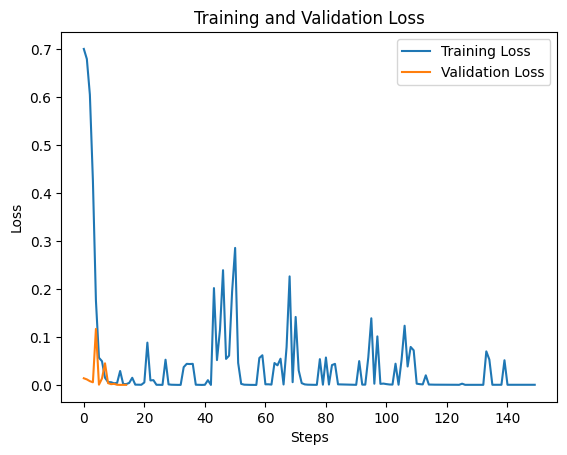

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0


In [ ]:
# Access the training and validation loss from the trainer's history
train_losses = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
val_losses = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# Create a plot for training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Steps") # Changed from Epochs to Steps as the evaluation strategy is steps
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

metrics = [log for log in trainer.state.log_history if 'eval_accuracy' in log]
if metrics:
    print("Training Accuracy:", metrics[-1]['eval_accuracy'] )
    print("Training Precision:", metrics[-1]['eval_precision'] )
    print("Training Recall:", metrics[-1]['eval_recall'] )
    print("Training F1:", metrics[-1]['eval_f1'] )
else:
    print("No metrics found in the log history.")

In [ ]:
# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)

# Save the trained model
trainer.save_model("./trained_model")


{'eval_loss': 0.0002528232871554792, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 30.9123, 'eval_samples_per_second': 64.699, 'eval_steps_per_second': 1.035, 'epoch': 3.0}


## 2.2.8 Write inference pipeline

In [ ]:
def inference_pipeline(text):
  inputs = classifer.tokenizer(text, return_tensors="pt").to("cuda")
  outputs = classifer.model(**inputs)
  predicted_class = outputs.logits.argmax(-1).item()
  print(f"Predicted class: {predicted_class}")
  return predicted_class

In [ ]:
predicted_class = inference_pipeline("As Votes For Trump Went Up, Canada’s Immigration Site Went Down")

Predicted class: 1


In [ ]:
predicted_class = inference_pipeline("Bigfoot Discovered in Alaska")

Predicted class: 0


In [ ]:
predicted_class = inference_pipeline("Donald Trump found in secret tryst with Hillary Clinton")

Predicted class: 0


## 2.2.9 Have session about lessons to learn for each member of the team by their own name.

This notebook demonstrates how to perform fake news detection using two different approaches: fine-tuning a pre-trained BERT model and building a custom LSTM model.

Here are some lessons learned from the creation of this notebook:

The importance of data preprocessing: Cleaning and preparing the data is crucial for model performance. This includes handling missing values, converting text to numerical representations, and splitting the data into training and validation sets.

The power of transfer learning: Fine-tuning pre-trained models like BERT can save time and resources compared to training a model from scratch.

The value of evaluating model performance: Analyzing metrics like accuracy, precision, recall, and F1 score is essential to understand how well the model generalizes to unseen data.

The importance of understanding the data: Analyzing the dataset through visualizations like word clouds and label distributions helps in understanding the characteristics of the data and potential challenges.

The effectiveness of different model architectures: Both transformer-based models (BERT) and recurrent neural networks (LSTM) can be effective for fake news detection, each with its own strengths and weaknesses:


Transformer-based models (like BERT)

Strengths:

Excellent at capturing long-range dependencies in text: This is crucial for understanding the context and meaning of a news article.

Pre-trained models available: Leveraging pre-trained models on massive datasets can lead to better performance and faster training.

Achieve state-of-the-art results on various NLP tasks: Including text classification.

Weaknesses:

Computationally expensive: Requires significant computational resources for training and inference.

Can be challenging to interpret: Understanding why a transformer model makes a particular prediction can be difficult.

Recurrent neural networks (like LSTM)

Strengths:

Effective at processing sequential data like text: Can capture the temporal dependencies in language.

Less computationally expensive than transformers: Can be trained and deployed with fewer resources.

Weaknesses:

Can struggle with very long sequences: May lose information from earlier parts of the text.

Generally not as performant as transformers on complex NLP tasks: Recent advances in transformers have surpassed LSTMs in many areas.



This notebook provides a comprehensive overview of different techniques for fake news detection, allowing users to compare and contrast different approaches. It also highlights the importance of data preprocessing, model evaluation, and understanding the data for building effective fake news detection models.